# PS4E4 - Abalone Regression 🐚🦢

# Setup

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark",palette="deep")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("./input/train.csv", index_col="id")
test = pd.read_csv("./input/test.csv", index_col="id")

# Data in a glance

## Variables Table
Gathered from the original Abalone Dataset website (https://archive.ics.uci.edu/dataset/1/abalone)

**No missing values**

In [5]:
pd.DataFrame(columns=["Variable Name", "Role", "Type", "Description", "Units"],
             data=[
                ["Sex","Feature", "Categorical", "M, F, and I (infant)"],
                ["Length", "Feature", "Continuous", "Longest shell measurement", "mm"],
                ["Diameter", "Feature", "Continuous", "perpendicular to length", "mm"],
                ["Height", "Feature", "Continuous", "with meat in shell", "mm"],
                ["Whole_weight", "Feature", "Continuous", "whole abalone", "grams"],
                ["Shucked_weight", "Feature", "Continuous", "weight of meat", "grams"],
                ["Viscera_weight", "Feature", "Continuous", "gut weight (after bleeding)", "grams"],
                ["Shell_weight", "Feature", "Continuous", "after being dried", "grams"],
                ["Rings", "Target", "Integer", "+1.5 gives the age in years"]
              ])

,Variable Name,Role,Type,Description,Units
0,Sex,Feature,Categorical,"M, F, and I (infant)",None
1,Length,Feature,Continuous,Longest shell measurement,mm
2,Diameter,Feature,Continuous,perpendicular to length,mm
3,Height,Feature,Continuous,with meat in shell,mm
4,Whole_weight,Feature,Continuous,whole abalone,grams
5,Shucked_weight,Feature,Continuous,weight of meat,grams
6,Viscera_weight,Feature,Continuous,gut weight (after bleeding),grams
7,Shell_weight,Feature,Continuous,after being dried,grams
8,Rings,Target,Integer,+1.5 gives the age in years,None


Whole weight.1 = Sucked_weight
Whole weight.2 = Viscera_weight

In [6]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [8]:
train.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# EDA

## Correlation

<Axes: >

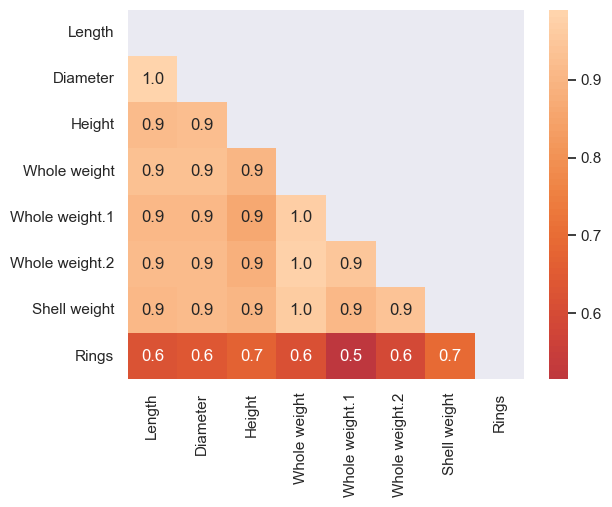

In [9]:
corr = train.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0)

## Feature Distribution

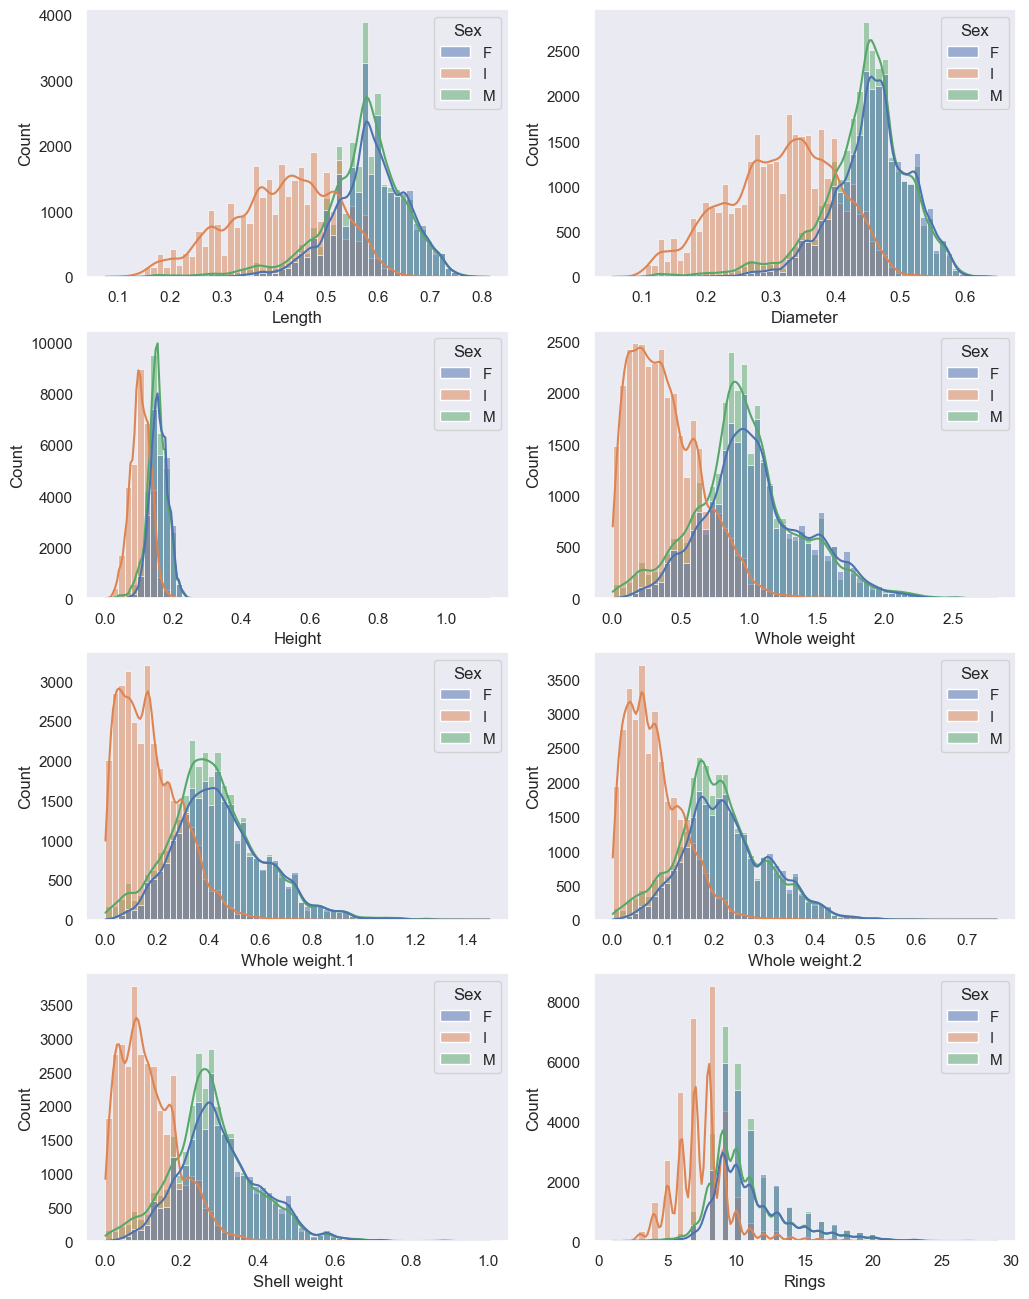

In [10]:
features = np.reshape(train.select_dtypes(include='number').columns, (4,2))

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

for i in range(4):
    for j in range(2):
        sns.histplot(x=train[features[i][j]], hue=train.Sex, bins=60, ax=axs[i][j], kde=True)

### Outliers

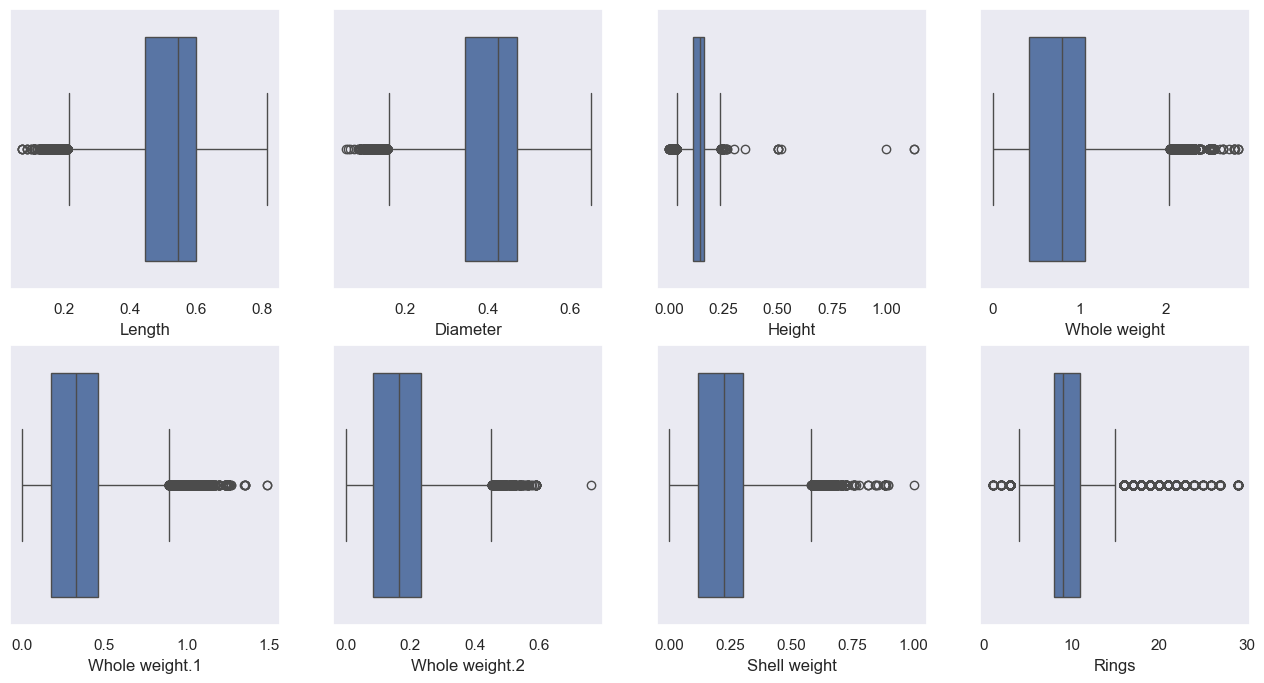

In [11]:
features = np.reshape(train.select_dtypes(include='number').columns, (2,4))

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i in range(2):
    for j in range(4):
        sns.boxplot(x=train[features[i][j]], ax=axs[i][j])

## Target Distribution

<Axes: xlabel='Rings', ylabel='Count'>

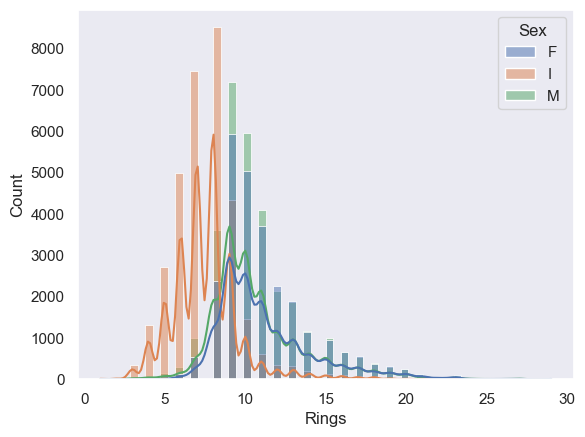

In [12]:
sns.histplot(x=train.Rings, hue=train.Sex, bins=60, kde=True)

## Features x Targets

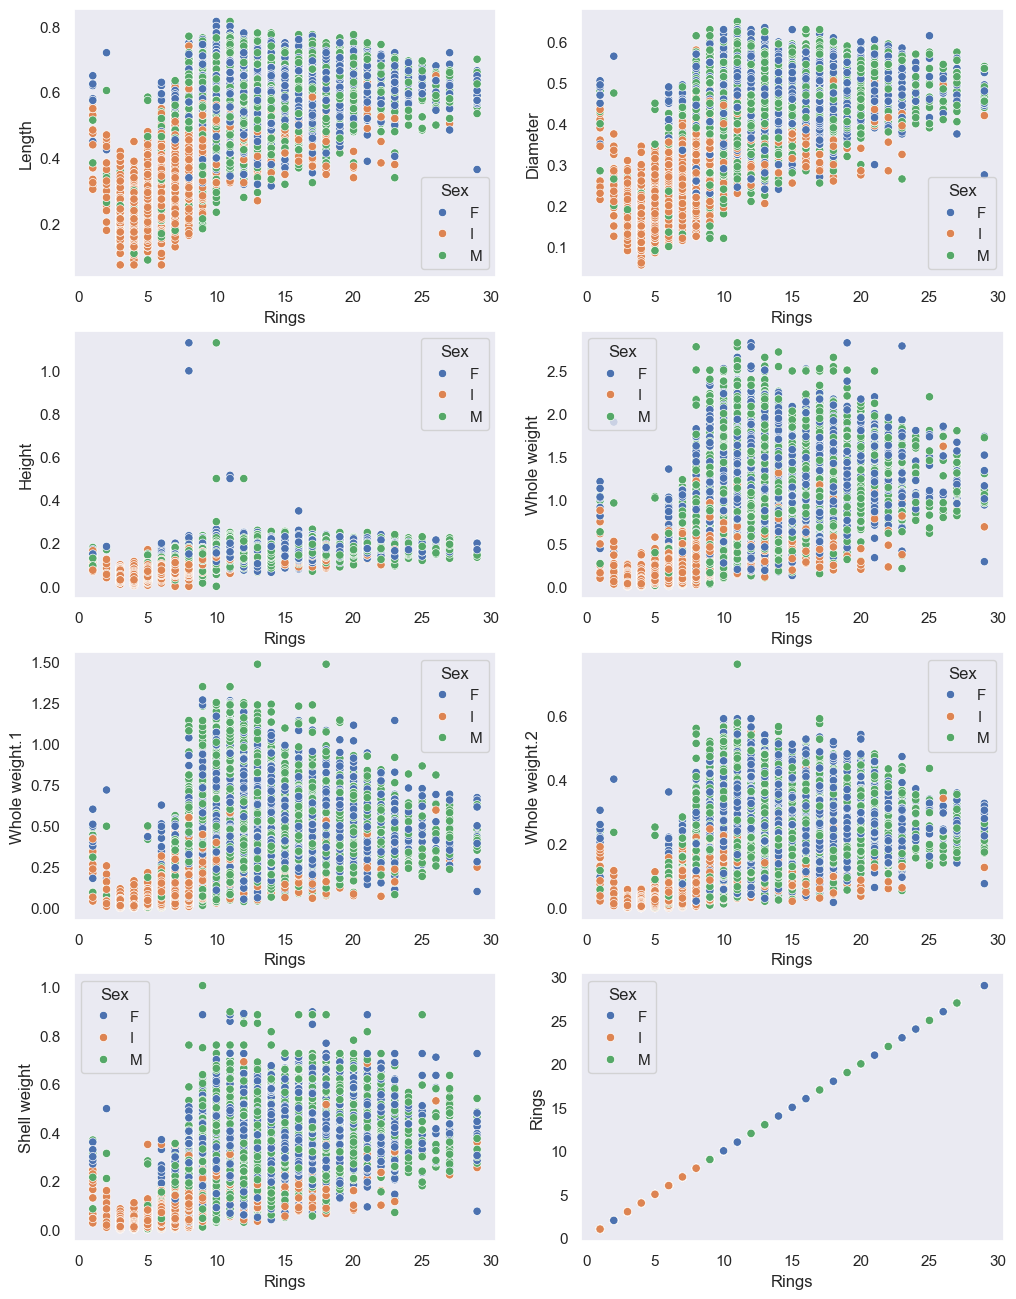

In [13]:
features = np.reshape(train.select_dtypes(include='number').columns, (4,2))

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

for i in range(4):
    for j in range(2):
        sns.scatterplot(data=train, x="Rings", y=features[i][j], hue=train.Sex, ax=axs[i][j])

## Measures

<Axes: xlabel='Diameter', ylabel='Height'>

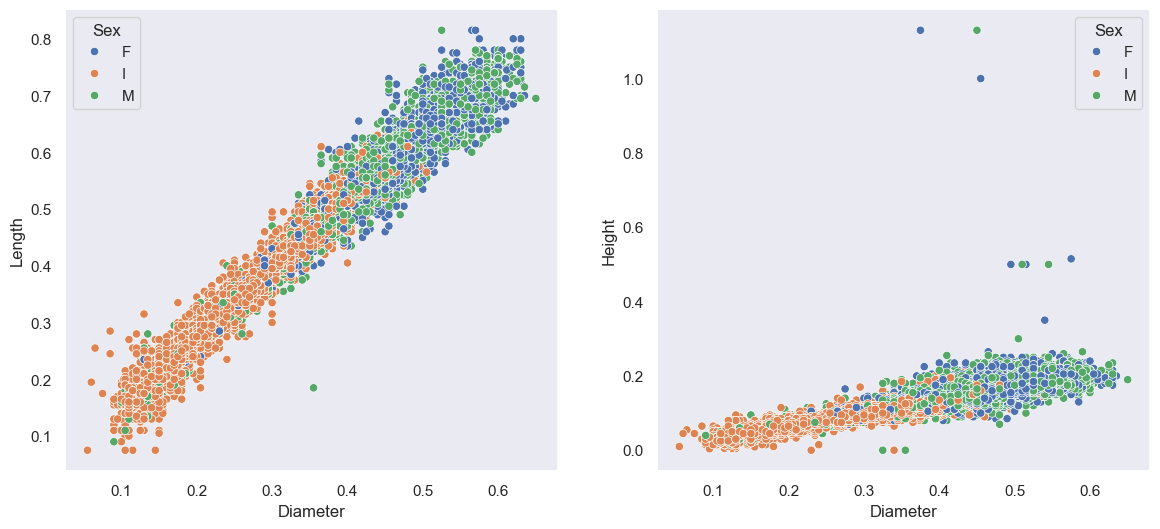

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(data=train, x="Diameter",y="Length", hue="Sex", ax=axs[0])
sns.scatterplot(data=train, x="Diameter",y="Height", hue="Sex", ax=axs[1])

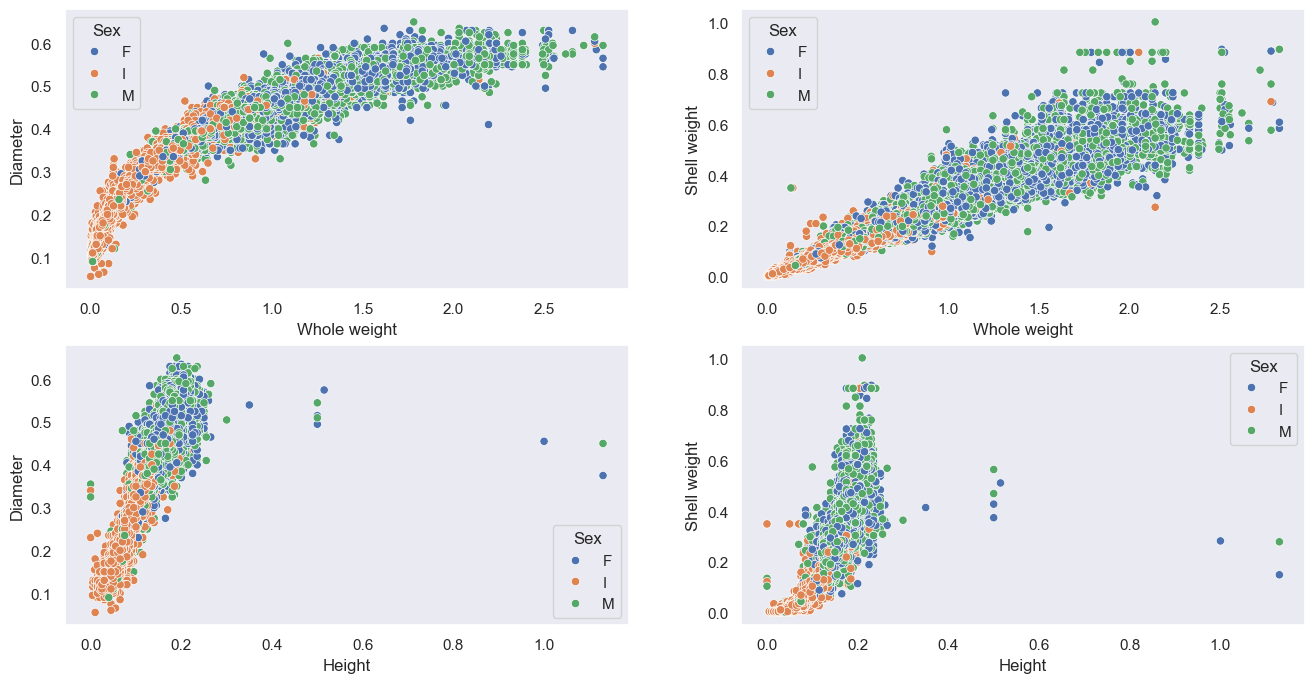

In [15]:
features = ["Whole weight", "Height", "Diameter", "Shell weight"]

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for i in range(2):
    for j in range(2):
        sns.scatterplot(data=train, x=features[i], y=features[j + 2], hue=train.Sex, ax=axs[i][j])

# Feature Engineering

## Select target feature

In [16]:
X = train.drop(columns=["Rings"])
y = train.Rings

## Surface Area

In [17]:
X["Surface Area"] = X["Length"] * X["Diameter"]

<Axes: xlabel='Rings', ylabel='Surface Area'>

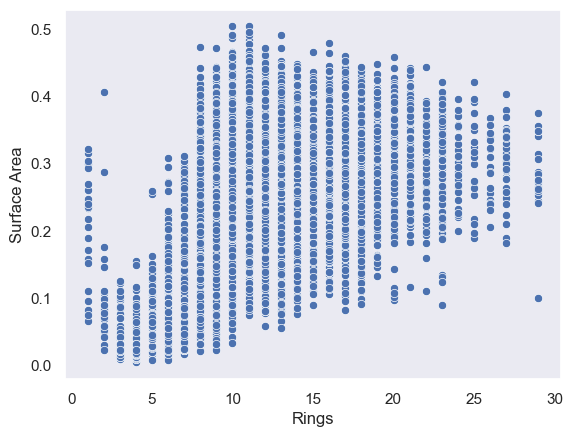

In [18]:
sns.scatterplot(x=y, y=X["Surface Area"])

## Water Loss

In [19]:
# Component weight cannot weight more than Whole weight
X['Shell weight']=np.where(X['Shell weight']>X['Whole weight'], X['Whole weight'], X['Shell weight'])
X['Whole weight.1']=np.where(X['Whole weight.1']>X['Whole weight'], X['Whole weight'], X['Whole weight.1'])
X['Whole weight.2']=np.where(X['Whole weight.2']>X['Whole weight'], X['Whole weight'], X['Whole weight.2'])

In [20]:
X["Water loss"]=X["Whole weight"]-X["Whole weight.1"]-X['Whole weight.2']-X['Shell weight']

In [21]:
X["Water loss"] = np.where((X["Water loss"] < 0), 0, X["Water loss"])

<Axes: xlabel='Rings', ylabel='Water loss'>

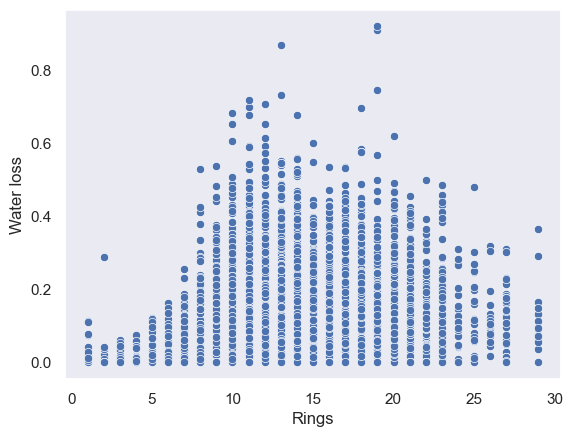

In [22]:
sns.scatterplot(x=y, y=X["Water loss"])

## Density

In [23]:
# Imputing 0 height
X.Height = np.where(X.Height == 0, X.Height.mean(), X.Height)

In [24]:
X["Density"] = X["Whole weight"] / X["Height"] * X["Diameter"]

<Axes: xlabel='Rings', ylabel='Density'>

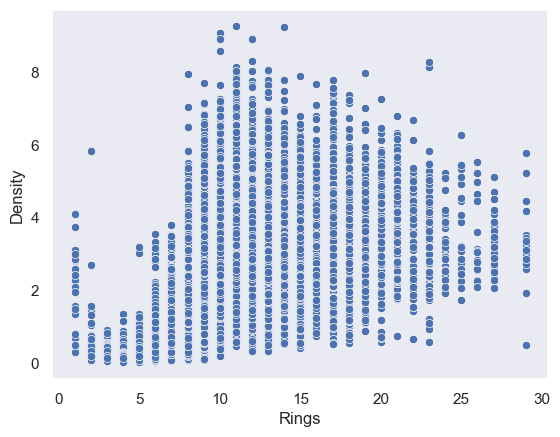

In [25]:
sns.scatterplot(x=y, y=X["Density"])

## Encode categorical feature

In [26]:
X = pd.get_dummies(X)

## MinMax Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Kmeans Clustering

In [28]:
from sklearn.cluster import KMeans

columns_to_cluster = ["Whole weight", "Diameter"]

kmeans = KMeans(n_clusters=3, random_state=42)
X["DimensionsCluster"] = kmeans.fit_predict(X[columns_to_cluster])
X["DimensionsCluster"] = X["DimensionsCluster"].astype("category")

<Axes: xlabel='Whole weight', ylabel='Diameter'>

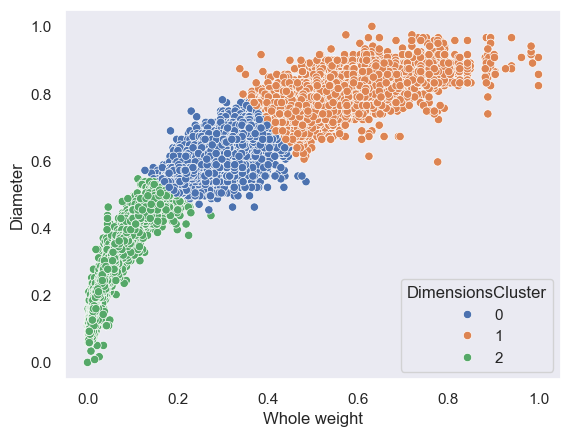

In [29]:
sns.scatterplot(data=X, x="Whole weight", y="Diameter", hue="DimensionsCluster")

<Axes: xlabel='DimensionsCluster', ylabel='Rings'>

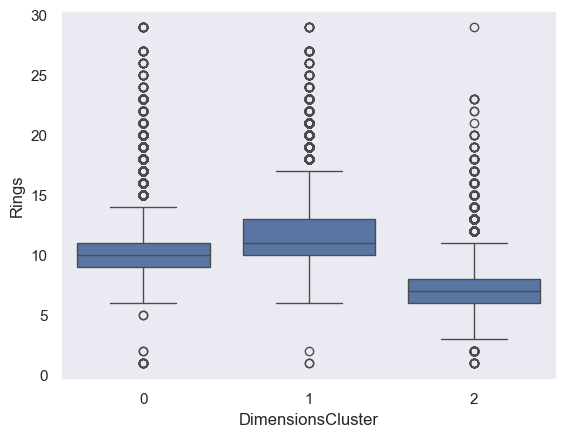

In [30]:
sns.boxplot(x=X.DimensionsCluster, y=y)

In [31]:
X = pd.get_dummies(X)

# Model Evaluation

In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [33]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)

params = {
    "n_estimators": [500, 200, 100],
    "learning_rate": [0.1, 0.05, 0.01],
    "max_depth": [7, 9, 12],
    "reg_lambda": [4],
    "reg_alpha": [4]
}

cv = GridSearchCV(xgb, params, cv=5, scoring="neg_mean_squared_log_error", verbose=1, error_score="raise")

In [34]:
cv.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 9, 12],
                         'n_estimators': [500, 200, 100], 'reg_alpha': [4],
                         'reg_lambda': [4]},
             scoring='neg_mean_squared_log_error', verbose=1)

In [35]:
results = pd.DataFrame(cv.cv_results_).sort_values("rank_test_score").head(10)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,2.295541,0.144761,0.075710,0.007118,0.05,7,500,4,4,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est...",-0.022398,-0.023282,-0.022740,-0.022068,-0.021868,-0.022471,0.000502,1
10,0.842917,0.094159,0.041251,0.002382,0.05,7,200,4,4,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est...",-0.022400,-0.023377,-0.022725,-0.022067,-0.021850,-0.022484,0.000536,2
1,0.742154,0.034384,0.041771,0.000988,0.1,7,200,4,4,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-0.022487,-0.023358,-0.022813,-0.022065,-0.021876,-0.022520,0.000531,3
2,0.472052,0.013596,0.032541,0.000630,0.1,7,100,4,4,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-0.022492,-0.023405,-0.022778,-0.022062,-0.021871,-0.022522,0.000544,4
13,1.653120,0.056552,0.048795,0.004090,0.05,9,200,4,4,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",-0.022502,-0.023365,-0.022788,-0.022175,-0.021953,-0.022557,0.000494,5
21,3.899765,0.019862,0.089170,0.002652,0.01,9,500,4,4,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",-0.022521,-0.023409,-0.022780,-0.022161,-0.021954,-0.022565,0.000509,6
14,1.036395,0.103598,0.036402,0.001201,0.05,9,100,4,4,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",-0.022544,-0.023400,-0.022763,-0.022183,-0.022006,-0.022579,0.000489,7
11,0.535039,0.052358,0.034302,0.001889,0.05,7,100,4,4,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est...",-0.022512,-0.023516,-0.022815,-0.022171,-0.022019,-0.022606,0.000532,8
18,2.028692,0.168107,0.063714,0.002062,0.01,7,500,4,4,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",-0.022516,-0.023509,-0.022818,-0.022188,-0.022013,-0.022609,0.000528,9
5,1.232948,0.407995,0.040773,0.003718,0.1,9,100,4,4,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",-0.022541,-0.023479,-0.022881,-0.022200,-0.022029,-0.022626,0.000517,10


In [36]:
np.sqrt(-results.iloc[0].mean_test_score.mean())

0.14990368466208687

# Final Model

## Separate test ids

In [37]:
test_ids = test.index

## Feature Engineering Section

In [38]:
# Surface Area
test["Surface Area"] = test["Length"] * test["Diameter"]

# Fixing weights
test['Shell weight'] = np.where(test['Shell weight'] > test['Whole weight'], test['Whole weight'], test['Shell weight'])
test['Whole weight.1'] = np.where(test['Whole weight.1'] > test['Whole weight'], test['Whole weight'], test['Whole weight.1'])
test['Whole weight.2'] = np.where(test['Whole weight.2'] > test['Whole weight'], test['Whole weight'], test['Whole weight.2'])

# Water loss
test["Water loss"] = test["Whole weight"] - test["Whole weight.1"] - test['Whole weight.2'] - test['Shell weight']
test["Water loss"] = np.where((test["Water loss"] < 0), 0, test["Water loss"])

# Density and fix null heights
test.Height = np.where(test.Height == 0, test.Height.mean(), test.Height)
test["Density"] = test["Whole weight"] / test["Height"] * test["Diameter"]

# One-hot Encoding
test = pd.get_dummies(test)

# MinMax Scaling
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

# Clustering
test["DimensionsCluster"] = kmeans.predict(test[columns_to_cluster])
test["DimensionsCluster"] = test["DimensionsCluster"].astype("category")
test = pd.get_dummies(test)

## Prediction

In [39]:
xgb = XGBRegressor(random_state=42, n_jobs=4, **cv.best_params_)

xgb.fit(X, y)

prediction = xgb.predict(test)

In [40]:
submission = pd.DataFrame({"id": test_ids, "Rings": prediction})
submission.to_csv('submission.csv', index=False)
print("Successfully created csv")

Successfully created csv
